# Transfer Learning

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.optimizers import Adam 
from kerastuner import RandomSearch
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\TruProjects\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.


In [3]:
im_shape = (128,128)

TRAINING_DIR = 'The IQ-OTHNCCD lung cancer dataset/train'
TEST_DIR = 'The IQ-OTHNCCD lung cancer dataset/test'

seed = 10

BATCH_SIZE = 16

In [4]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        preprocessing_function=preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
val_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

In [5]:
# Generator para parte train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 878 images belonging to 3 classes.
Found 219 images belonging to 3 classes.
Found 1097 images belonging to 3 classes.
Classes: ['Bengin cases', 'Malignant cases', 'Normal cases']


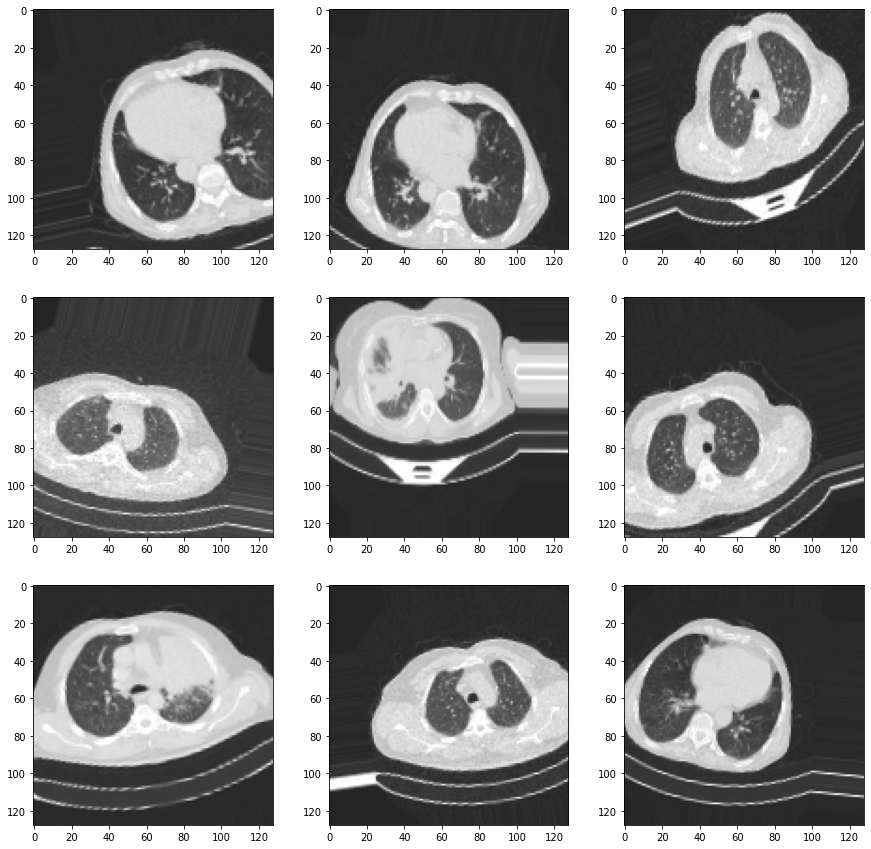

In [6]:
# Visualizando alguns exemplos do dataset por meio do Generator criado
plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = (train_generator.next()[0]+1)/2*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

# AlexNet

In [7]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',input_shape = (im_shape[0], im_shape[1], 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

learning_rate = 0.001

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 16)      2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 124, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        4

In [9]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='alexnet.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,verbose=1)
]

In [10]:
r1 = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=20,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/20
53/54 [============================>.] - ETA: 0s - loss: 1.0895 - accuracy: 0.5000
Epoch 00001: val_loss improved from inf to 1.07933, saving model to alexnet.h5
54/54 [==============================] - 6s 104ms/step - loss: 1.0894 - accuracy: 0.4977 - val_loss: 1.0793 - val_accuracy: 0.5385
Epoch 2/20
54/54 [==============================] - ETA: 0s - loss: 1.0718 - accuracy: 0.5058
Epoch 00002: val_loss improved from 1.07933 to 1.06268, saving model to alexnet.h5
54/54 [==============================] - 5s 98ms/step - loss: 1.0718 - accuracy: 0.5058 - val_loss: 1.0627 - val_accuracy: 0.5385
Epoch 3/20
54/54 [==============================] - ETA: 0s - loss: 1.0564 - accuracy: 0.5070
Epoch 00003: val_loss improved from 1.06268 to 1.04808, saving model to alexnet.h5
54/54 [==============================] - 5s 97ms/step - loss: 1.0564 - accuracy: 0.5070 - val_loss: 1.0481 - val_accuracy: 0.5385
Epoch 4/20
54/54 [==============================] - ETA: 0s - loss: 1.0422 - accur

In [1]:
#model.save('alexnet.h5')

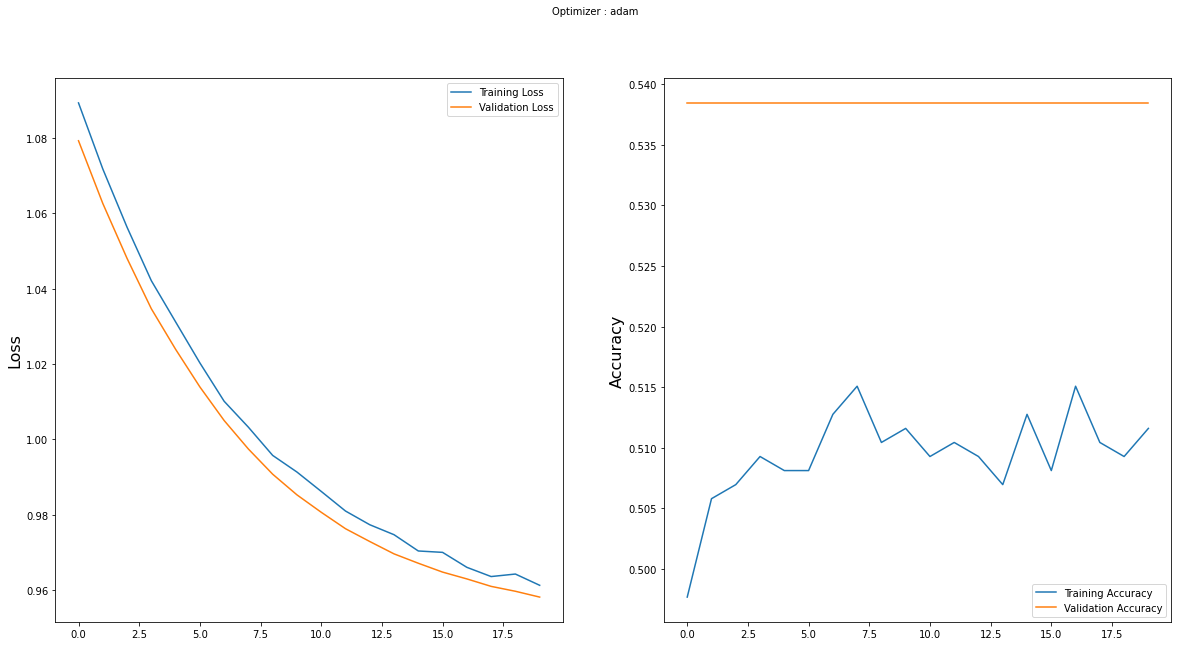

In [12]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# MobileNet

In [13]:
from tensorflow.keras.applications import MobileNet
mob = MobileNet(input_shape = (im_shape[0], im_shape[1], 3), weights='imagenet', include_top=False)

In [14]:
x1= Flatten()(mob.output)
prediction1 = Dense(num_classes, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)       

In [15]:
epochs = 200

# Saving the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='mobile.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,verbose=1)
]

history = model12.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/200
54/54 [==============================] - ETA: 0s - loss: 1.0897 - accuracy: 0.4965 ETA: 0s - loss: 1.0899 - accuracy: 0.49
Epoch 00001: val_loss improved from inf to 1.07932, saving model to mobile.h5
54/54 [==============================] - 6s 104ms/step - loss: 1.0897 - accuracy: 0.4965 - val_loss: 1.0793 - val_accuracy: 0.5385
Epoch 2/200
54/54 [==============================] - ETA: 0s - loss: 1.0718 - accuracy: 0.5128
Epoch 00002: val_loss improved from 1.07932 to 1.06280, saving model to mobile.h5
54/54 [==============================] - 5s 98ms/step - loss: 1.0718 - accuracy: 0.5128 - val_loss: 1.0628 - val_accuracy: 0.5385
Epoch 3/200
54/54 [==============================] - ETA: 0s - loss: 1.0562 - accuracy: 0.5104
Epoch 00003: val_loss improved from 1.06280 to 1.04779, saving model to mobile.h5
54/54 [==============================] - 5s 99ms/step - loss: 1.0562 - accuracy: 0.5104 - val_loss: 1.0478 - val_accuracy: 0.5385
Epoch 4/200
54/54 [=======================

Epoch 28/200
54/54 [==============================] - ETA: 0s - loss: 0.9550 - accuracy: 0.5116
Epoch 00028: val_loss improved from 0.95336 to 0.95309, saving model to mobile.h5
54/54 [==============================] - 5s 99ms/step - loss: 0.9550 - accuracy: 0.5116 - val_loss: 0.9531 - val_accuracy: 0.5385
Epoch 29/200
54/54 [==============================] - ETA: 0s - loss: 0.9546 - accuracy: 0.5116
Epoch 00029: val_loss improved from 0.95309 to 0.95280, saving model to mobile.h5
54/54 [==============================] - 5s 99ms/step - loss: 0.9546 - accuracy: 0.5116 - val_loss: 0.9528 - val_accuracy: 0.5385
Epoch 30/200
54/54 [==============================] - ETA: 0s - loss: 0.9555 - accuracy: 0.5116 ETA: 1s - los
Epoch 00030: val_loss improved from 0.95280 to 0.95257, saving model to mobile.h5
54/54 [==============================] - 5s 99ms/step - loss: 0.9555 - accuracy: 0.5116 - val_loss: 0.9526 - val_accuracy: 0.5385
Epoch 31/200
54/54 [==============================] - ETA: 0s 

54/54 [==============================] - ETA: 0s - loss: 0.9485 - accuracy: 0.5151
Epoch 00056: val_loss did not improve from 0.95165
54/54 [==============================] - 5s 94ms/step - loss: 0.9485 - accuracy: 0.5151 - val_loss: 0.9519 - val_accuracy: 0.5385
Epoch 57/200
54/54 [==============================] - ETA: 0s - loss: 0.9503 - accuracy: 0.5139
Epoch 00057: val_loss did not improve from 0.95165
54/54 [==============================] - 5s 95ms/step - loss: 0.9503 - accuracy: 0.5139 - val_loss: 0.9517 - val_accuracy: 0.5385
Epoch 58/200
54/54 [==============================] - ETA: 0s - loss: 0.9513 - accuracy: 0.5104
Epoch 00058: val_loss did not improve from 0.95165
54/54 [==============================] - 5s 95ms/step - loss: 0.9513 - accuracy: 0.5104 - val_loss: 0.9521 - val_accuracy: 0.5385
Epoch 59/200
54/54 [==============================] - ETA: 0s - loss: 0.9527 - accuracy: 0.5104
Epoch 00059: val_loss did not improve from 0.95165
54/54 [============================

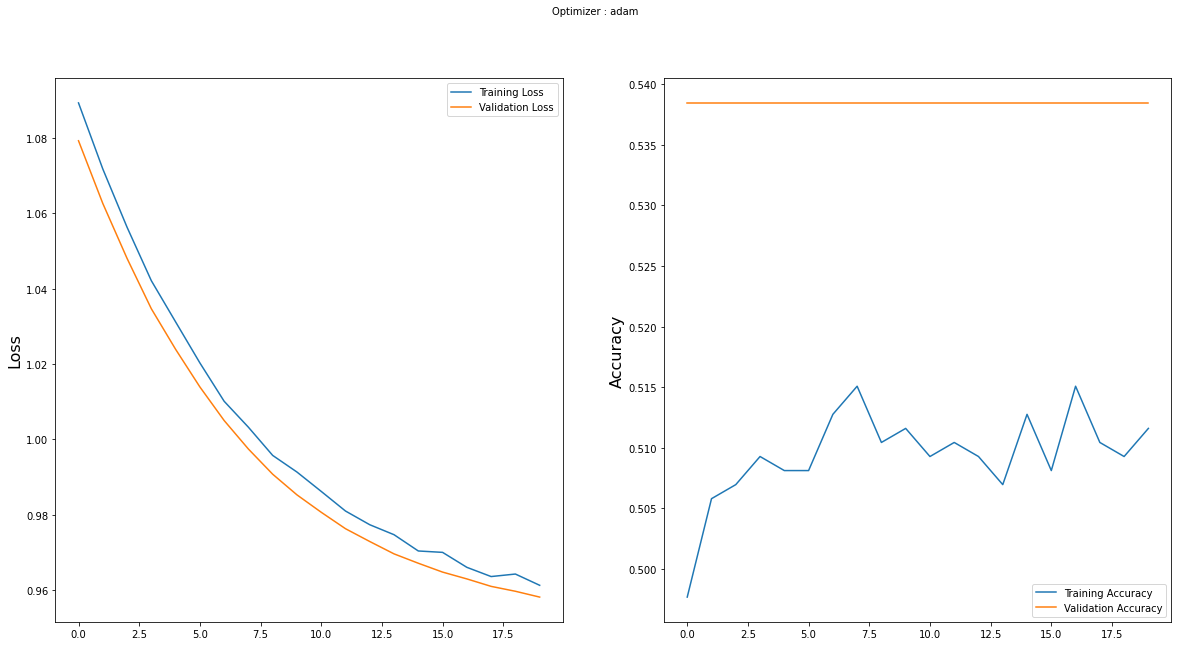

In [16]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# CNN

In [18]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [19]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (im_shape[0], im_shape[1], 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

learning_rate = 0.001

model.compile(loss = categorical_crossentropy,
              optimizer = Adam(learning_rate),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 126, 16)      64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 16)      2320      
_________________________________________________________________
batch_normalization_5 (Batch (None, 124, 124, 16)      64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 32)       

In [21]:
r1 = epochs = 20

# Saving the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='cnn.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,verbose=1)
]

history = model12.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/20
54/54 [==============================] - ETA: 0s - loss: 0.9477 - accuracy: 0.5128
Epoch 00001: val_loss improved from inf to 0.95218, saving model to cnn.h5
54/54 [==============================] - 5s 99ms/step - loss: 0.9477 - accuracy: 0.5128 - val_loss: 0.9522 - val_accuracy: 0.5385
Epoch 2/20
54/54 [==============================] - ETA: 0s - loss: 0.9513 - accuracy: 0.5104
Epoch 00002: val_loss did not improve from 0.95218
54/54 [==============================] - 5s 94ms/step - loss: 0.9513 - accuracy: 0.5104 - val_loss: 0.9524 - val_accuracy: 0.5385
Epoch 3/20
54/54 [==============================] - ETA: 0s - loss: 0.9513 - accuracy: 0.5104
Epoch 00003: val_loss improved from 0.95218 to 0.95202, saving model to cnn.h5
54/54 [==============================] - 5s 98ms/step - loss: 0.9513 - accuracy: 0.5104 - val_loss: 0.9520 - val_accuracy: 0.5385
Epoch 4/20
54/54 [==============================] - ETA: 0s - loss: 0.9556 - accuracy: 0.5104
Epoch 00004: val_loss did not

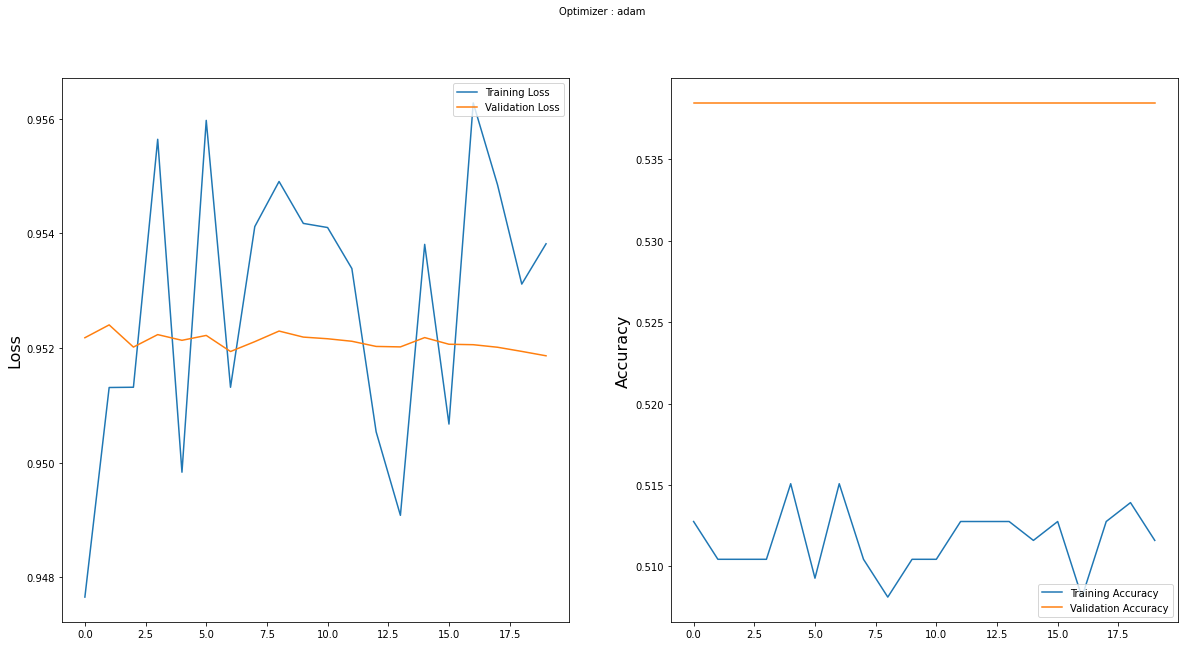

In [23]:
import matplotlib.pyplot as plt

x=history
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# AlexNet + MobileNet

In [24]:
import efficientnet.keras
from keras.models import load_model

In [28]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Input,Average

In [29]:

def ensemble():

    model_1 = load_model("alexnet.h5")
    model_1 = Model(inputs = model_1.inputs, outputs = model_1.outputs, name = 'AlexNet')

    model_2 = load_model("mobile.h5")
    model_2 = Model(inputs = model_2.inputs, outputs = model_2.outputs, name = 'Mobile')
    
   
    models = [model_1, model_2]


    models_input = Input(shape =(128,128,3))
    models_output = [model(models_input) for model in models]
    
    ensemble_output = Average()(models_output)

    simple_average = Model(inputs = models_input, outputs = ensemble_output, name = 'Ensemble')

    return simple_average

In [30]:
model = ensemble()
model.summary()

Model: "Ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
AlexNet (Functional)            (None, 3)            14324883    input_2[0][0]                    
__________________________________________________________________________________________________
Mobile (Functional)             (None, 3)            3278019     input_2[0][0]                    
__________________________________________________________________________________________________
average (Average)               (None, 3)            0           AlexNet[0][0]                    
                                                                 Mobile[0][0]              

In [31]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [32]:
epochs = 20

# Saving the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='hybird.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,verbose=1)
]

history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/20
54/54 [==============================] - ETA: 0s - loss: 0.9572 - accuracy: 0.5081
Epoch 00001: val_loss improved from inf to 0.95324, saving model to hybird.h5
54/54 [==============================] - 6s 110ms/step - loss: 0.9572 - accuracy: 0.5081 - val_loss: 0.9532 - val_accuracy: 0.5385
Epoch 2/20
54/54 [==============================] - ETA: 0s - loss: 0.9579 - accuracy: 0.5081
Epoch 00002: val_loss improved from 0.95324 to 0.95285, saving model to hybird.h5
54/54 [==============================] - 5s 101ms/step - loss: 0.9579 - accuracy: 0.5081 - val_loss: 0.9529 - val_accuracy: 0.5385
Epoch 3/20
54/54 [==============================] - ETA: 0s - loss: 0.9563 - accuracy: 0.5081
Epoch 00003: val_loss improved from 0.95285 to 0.95278, saving model to hybird.h5
54/54 [==============================] - 5s 101ms/step - loss: 0.9563 - accuracy: 0.5081 - val_loss: 0.9528 - val_accuracy: 0.5385
Epoch 4/20
54/54 [==============================] - ETA: 0s - loss: 0.9544 - accura

In [33]:
#hist = model.fit(train_set, epochs=2, verbose=1,validation_data=train_set)

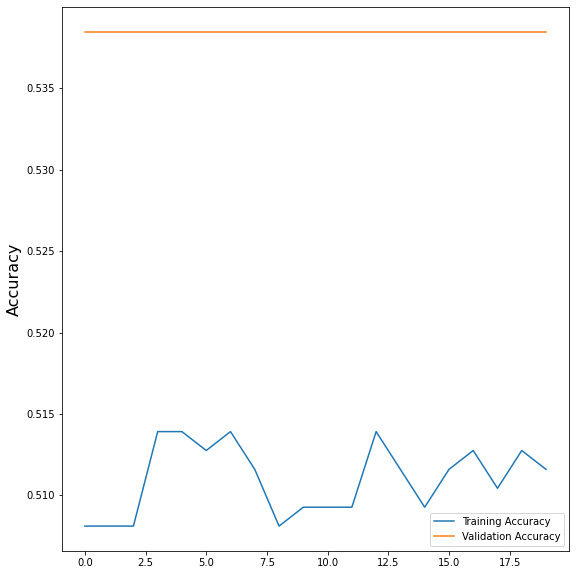

In [35]:
import matplotlib.pyplot as plt

x = history
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Full CNN

In [36]:
train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = ('The IQ-OTHNCCD lung cancer dataset/train/')
path_test = ('The IQ-OTHNCCD lung cancer dataset/test/')
img_size= 300

In [37]:
for i in os.listdir(path_train):
    for j in os.listdir(path_train+i):
        train_img.append (cv2.resize(cv2.imread(path_train+i+'/'+j), (img_size,img_size))) 
        train_labels.append(i)
        
for i in os.listdir(path_test):
    for j in os.listdir(path_test+i):
        test_img.append (cv2.resize(cv2.imread(path_test+i+'/'+j), (img_size,img_size))) 
        test_labels.append(i)
        
train_img = (np.array(train_img))
test_img = (np.array(test_img))

In [38]:
train_labels_encoded = [0 if category == 'Bengin cases' else(1 if category == 'Malignant cases' else 2) for category in list(train_labels)]
test_labels_encoded = [0 if category == 'Bengin cases' else(1 if category == 'Malignant cases' else 2) for category in list(test_labels)]

In [39]:
print("Shape of train: ",(train_img).shape," and shape of test: ", (test_img).shape)

Shape of train:  (1097, 300, 300, 3)  and shape of test:  (1097, 300, 300, 3)


In [40]:
img_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen.fit(train_img)
img_datagen.fit(test_img)

In [41]:
train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((987, 300, 300, 3), (987,), (110, 300, 300, 3), (110,))

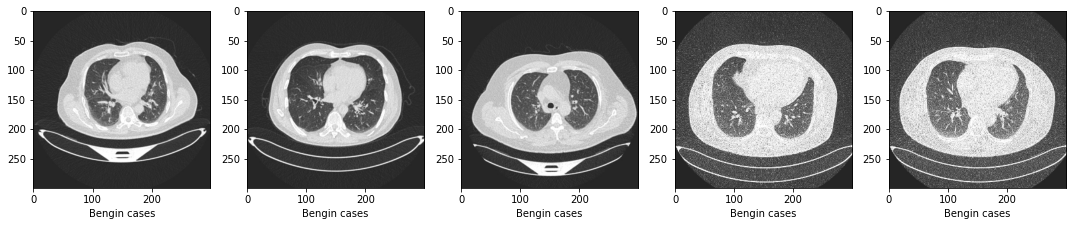

In [42]:
plt.figure(figsize = (15,15));
for i,j in enumerate(train_img):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

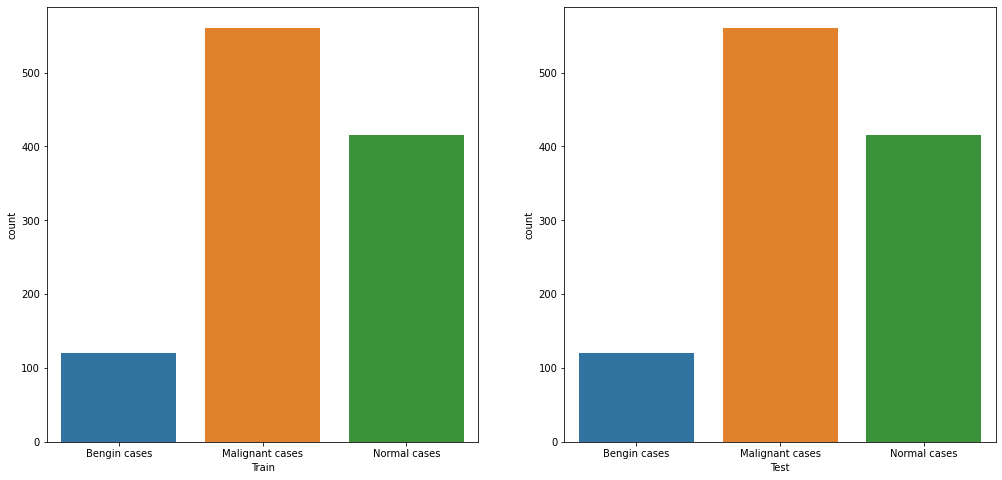

In [43]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

In [47]:
model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(5,5) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(3, activation='sigmoid')
  ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
history = model.fit(tf.cast(train_img, tf.float32), np.array(pd.get_dummies(train_labels)), validation_split=0.1, epochs =20, verbose=1, batch_size=32)

Epoch 1/20
31/31 [==============================] - 1s 27ms/step - loss: 0.0056 - accuracy: 0.1226 - val_loss: 1.1921e-07 - val_accuracy: 0.0000e+00
Epoch 2/20
31/31 [==============================] - 1s 18ms/step - loss: 1.1921e-07 - accuracy: 0.1216 - val_loss: 1.1921e-07 - val_accuracy: 0.0000e+00
Epoch 3/20
31/31 [==============================] - 1s 18ms/step - loss: 1.1921e-07 - accuracy: 0.1226 - val_loss: 1.1921e-07 - val_accuracy: 0.0000e+00
Epoch 4/20
31/31 [==============================] - 1s 18ms/step - loss: 1.1921e-07 - accuracy: 0.1216 - val_loss: 1.1921e-07 - val_accuracy: 0.0000e+00
Epoch 5/20
31/31 [==============================] - 1s 18ms/step - loss: 1.1921e-07 - accuracy: 0.1216 - val_loss: 1.1921e-07 - val_accuracy: 0.0000e+00
Epoch 6/20
31/31 [==============================] - 1s 18ms/step - loss: 1.1921e-07 - accuracy: 0.1216 - val_loss: 1.1921e-07 - val_accuracy: 0.0000e+00
Epoch 7/20
31/31 [==============================] - 1s 18ms/step - loss: 1.1921e-07 - 

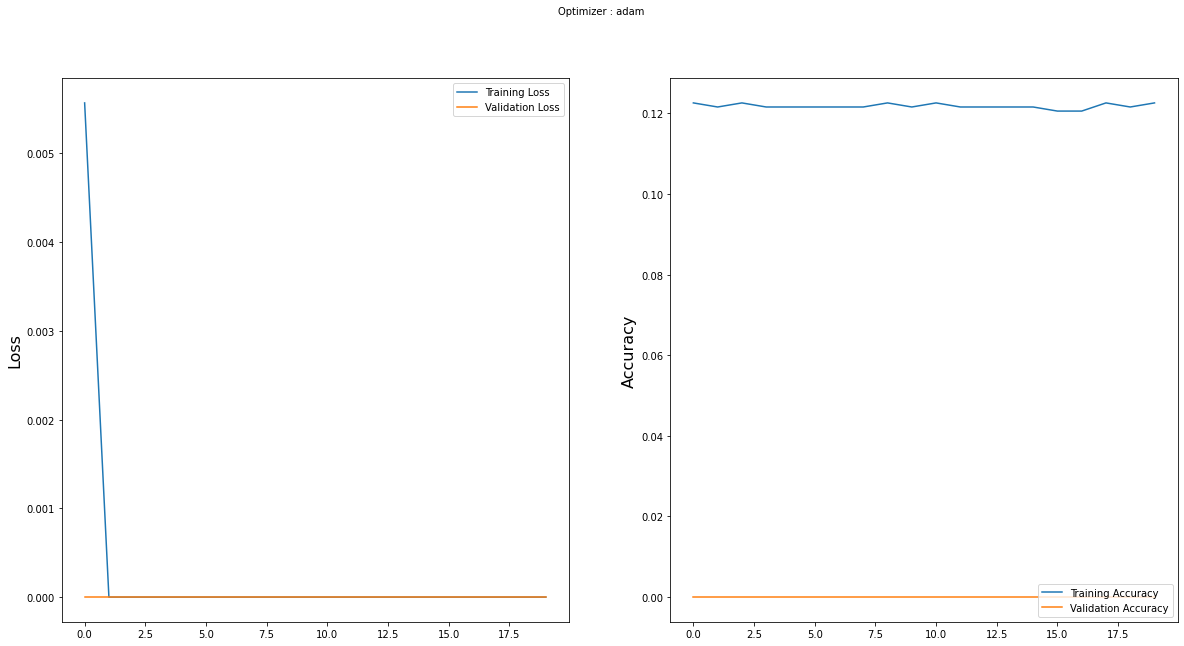

In [49]:
import matplotlib.pyplot as plt

x=history
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Cascaded Ensembling of FCNN

In [50]:
train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((987, 300, 300, 3), (987,), (110, 300, 300, 3), (110,))

In [51]:
transforming_img = transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),  
    transforms.Normalize([0.5,0.5,0.5], 
                        [0.5,0.5,0.5])
])

In [52]:
train_path = ('The IQ-OTHNCCD lung cancer dataset/train/')
test_path = ('The IQ-OTHNCCD lung cancer dataset/test/')

train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transforming_img),
    batch_size=64, shuffle=True
)
test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transforming_img),
    batch_size=32, shuffle=True
)

In [53]:
#categories
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [54]:
print(f'The classes are: {classes}')

The classes are: ['Bengin cases', 'Malignant cases', 'Normal cases']


In [55]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [56]:
train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))

In [57]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=4):
        super(ConvNet,self).__init__()
        
         
        self.conv1=nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        
        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()        
        self.pool=nn.MaxPool2d(kernel_size=2)
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        self.relu2=nn.ReLU()
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)
        
        
        
        #Feed forwad function
        
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
        output=self.pool(output)
        output=self.conv2(output)
        output=self.relu2(output)
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)            
        output=output.view(-1,32*75*75)
        output=self.fc(output)
            
        return output
    
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
   
model=ConvNet(num_classes=3).to(device)

In [58]:
for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

In [59]:
images.shape

torch.Size([9, 3, 150, 150])

In [61]:
#Optmizer and loss function
optimizer=Adam(model.parameters(),lr=0.001)
loss_function=nn.CrossEntropyLoss()

In [65]:
best_accuracy=0.0

for epoch in range(50):
    
    #Evaluation and training on training dataset
    model.train()
    train_accuracy=0.0
    train_loss=0.0
    
    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        #optimizer.zero_grad()
        
        outputs=model(images)
        loss=loss_function(outputs,labels)
        loss.backward()
        #optimizer.step()
        
        
        train_loss+= loss.cpu().data*images.size(0)
        _,prediction=torch.max(outputs.data,1)
        
        train_accuracy+=int(torch.sum(prediction==labels.data))
        
    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count
    
    
    # Evaluation on testing dataset
    model.eval()
    
    test_accuracy=0.0
    for i, (images,labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        outputs=model(images)
        _,prediction=torch.max(outputs.data,1)
        test_accuracy+=int(torch.sum(prediction==labels.data))
    
    test_accuracy=test_accuracy/test_count
    
    
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))
    
    if test_accuracy>best_accuracy:
        torch.save(model.state_dict(),'best_checkpoint.model')
        best_accuracy=test_accuracy

Epoch: 0 Train Loss: tensor(1.1410) Train Accuracy: 0.37101185050136737 Test Accuracy: 0.37374658158614404
Epoch: 1 Train Loss: tensor(1.1395) Train Accuracy: 0.3637192342752963 Test Accuracy: 0.37556973564266183
Epoch: 2 Train Loss: tensor(1.1366) Train Accuracy: 0.35824977210574294 Test Accuracy: 0.3646308113035551
Epoch: 3 Train Loss: tensor(1.1370) Train Accuracy: 0.3664539653600729 Test Accuracy: 0.3673655423883318
Epoch: 4 Train Loss: tensor(1.1421) Train Accuracy: 0.37101185050136737 Test Accuracy: 0.3637192342752963
Epoch: 5 Train Loss: tensor(1.1404) Train Accuracy: 0.37101185050136737 Test Accuracy: 0.37283500455788515
Epoch: 6 Train Loss: tensor(1.1332) Train Accuracy: 0.381950774840474 Test Accuracy: 0.35916134913400183
Epoch: 7 Train Loss: tensor(1.1411) Train Accuracy: 0.3701002734731085 Test Accuracy: 0.37830446672743845
Epoch: 8 Train Loss: tensor(1.1396) Train Accuracy: 0.3691886964448496 Test Accuracy: 0.365542388331814
Epoch: 9 Train Loss: tensor(1.1393) Train Accura

# ML

In [66]:
import sys
import shutil
from glob import glob
import json
import math
import os
import cv2
import glob as gb
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.applications import densenet
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools

In [67]:
code = {'Bengin cases':0 ,'Malignant cases':1,'Normal cases':2}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [68]:

#NOTE: This cell would only run properly if data is hosted locally

#the directory that contain the train images set
trainpath='The IQ-OTHNCCD lung cancer dataset/train/'

X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*'))
    for file in files: 
        image = cv2.imread(file)
        #resize images to 64 x 64 pixels
        image_array = cv2.resize(image , (32,32))
        X_train.append(list(image_array))
        y_train.append(code[folder])
np.save('X_train',X_train)
np.save('y_train',y_train)

In [69]:
#NOTE: This cell would only run properly if data is hosted locally

#the directory that contain the train images set
testpath= 'The IQ-OTHNCCD lung cancer dataset/test/'

X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*'))
    for file in files: 
        image = cv2.imread(file)
        #resize images to 64 x 64 pixels
        image_array = cv2.resize(image , (32,32))
        X_test.append(list(image_array))
        y_test.append(code[folder])
np.save('X_test',X_test)
np.save('y_test',y_test)

In [70]:
loaded_X_train = np.load('X_train.npy')
loaded_X_test = np.load('X_test.npy')
loaded_y_train = np.load('y_train.npy')
loaded_y_test = np.load('y_test.npy')

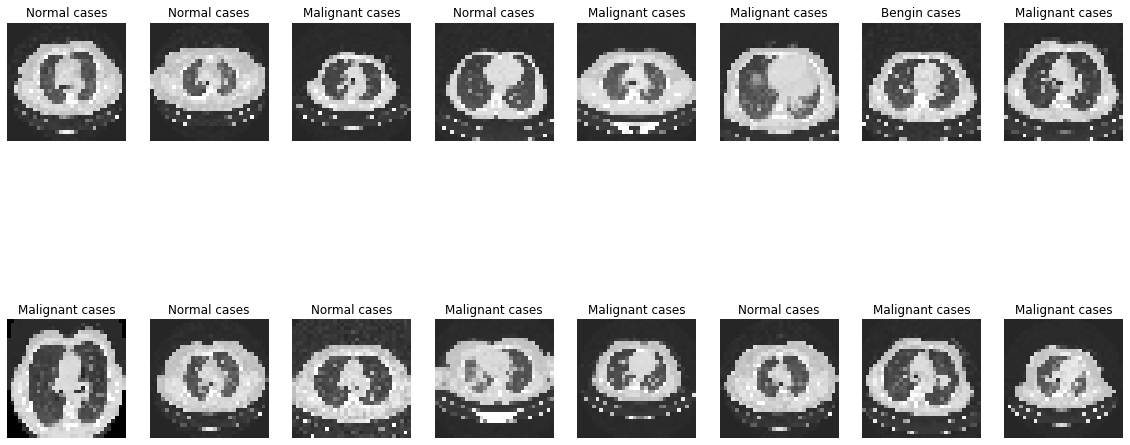

In [71]:
plt.figure(figsize=(20,10))
for n , i in enumerate(np.random.randint(0,len(loaded_X_train),16)): 
    plt.subplot(2,8,n+1)
    plt.imshow(loaded_X_train[i])
    plt.axis('off')
    plt.title(getcode(loaded_y_train[i]))

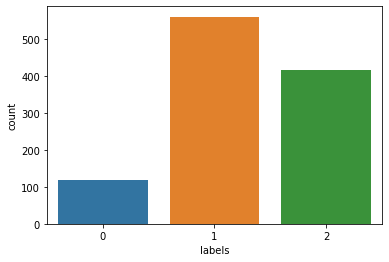

In [72]:
import seaborn as sns
df_train = pd.DataFrame()
df_train["labels"]= loaded_y_train
lab = df_train['labels']
dist = lab.value_counts()
sns.countplot(lab)
plt.show()

In [73]:
def plotHistogram(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5)
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5)
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5)


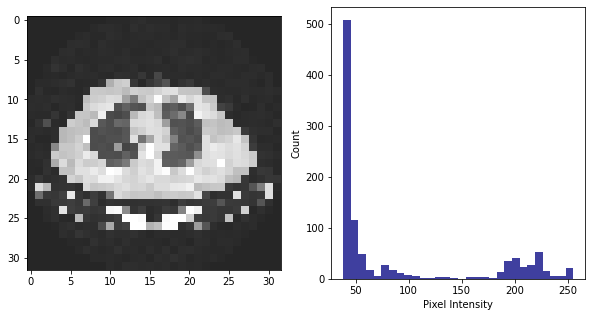

In [74]:
plotHistogram(loaded_X_train[np.random.randint(len(loaded_X_train))])

In [75]:
# Python program to explain cv2.imread() method

# importing cv2
import cv2

# path
path = r'The IQ-OTHNCCD lung cancer dataset/train/Malignant cases/Malignant case (10).jpg'

# Using cv2.imread() method
img = cv2.imread(path)

# Displaying the image
cv2.imwrite('image.png',img)

True

In [76]:
img_path = "The IQ-OTHNCCD lung cancer dataset/train/Malignant cases/Malignant case (10).jpg"
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))
dim=(500,590)
image=cv2.resize(image, dim)
#cv2.imshow(image)
#cv2.imshow('', image)
#cv2.waitKey(0)

width: 512 pixels
height: 512 pixels
channels: 3


In [77]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, 0.7)
#cv2_imshow(gray)
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
cv2.imwrite('thresh.png',thresh)
(T, threshInv) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite('thresinv.png',threshInv)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2.imwrite('morpho.png',closed)
     

True

In [78]:
closed = cv2.erode(closed, None, iterations = 14)
closed = cv2.dilate(closed, None, iterations = 13)
cv2.imwrite('dilate.png',closed)

True

In [79]:
ret,mask = cv2.threshold(closed, 155, 255, cv2.THRESH_BINARY) 
#apply AND operation on image and mask generated by thrresholding
final = cv2.bitwise_and(image,image,mask = mask) 
#plot the result
cv2.imwrite('bitwise.png',final)

True

In [80]:
def auto_canny(image, sigma=0.33):
  # compute the median of the single channel pixel intensities
  v = np.median(image)
  # apply automatic Canny edge detection using the computed median
  lower = int(max(0, (1.0 - sigma) * v))
  upper = int(min(255, (1.0 + sigma) * v))
  edged = cv2.Canny(image, lower, upper)
  # return the edged image
  return edged
canny = auto_canny(closed)
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (0, 0, 255), 2)
cv2.imwrite('final.png',image) 
#cv2_imshow(canny)

True

In [81]:
X_train = loaded_X_train.reshape([-1, np.product((32,32,3))])
X_test = loaded_X_test.reshape([-1, np.product((32,32,3))])

In [82]:
y_train = loaded_y_train
y_test = loaded_y_test

In [83]:
#shuffle train and test data sets in a consistent way

from sklearn.utils import shuffle as shf
X_train, y_train = shf(X_train, y_train, random_state=15)
X_test, y_test = shf(X_test, y_test, random_state=15)

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [85]:
#making an instance of each algorithm
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train,y_train)
y_pred_svm =svm_clf.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[115,   0,   5],
       [  0, 561,   0],
       [  0,   1, 415]], dtype=int64)

In [87]:
confusion = confusion_matrix(y_test,y_pred_svm)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
from sklearn import metrics
svn_sensitivity = ((TP / float(FN + TP)))* 100

print(svn_sensitivity)
svn_specificity = ((TN / (TN + FP))) * 100

print(svn_specificity)

0.8298816568047337
17.011834319526628
nan


In [88]:
print("*Precision Report for SVM: ")
print(precision_score(y_test,y_pred_svm,average='weighted'))
print("*Recall Report for SVM: ")
print(recall_score(y_test,y_pred_svm,average='weighted'))
print("*F1 Report for SVM: ")
print(f1_score(y_test,y_pred_svm,average='weighted'))

*Precision Report for SVM: 
0.9945755682835455
*Recall Report for SVM: 
0.9945305378304466
*F1 Report for SVM: 
0.994495540395259


# Voting Classaifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(n_estimators=100,max_depth=1, random_state=0)
clf2 = svm.SVC()
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('RF', clf1), ('svc', clf2), ('dt', clf3)], voting='hard')

eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_train)
val4 = (accuracy_score(y_train, predictions)*100)
print("*Accuracy score for Voting Classifier: ", val4, "\n")
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_train, predictions))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_train, predictions))

*Accuracy score for Voting Classifier:  99.72652689152234 

*Confusion Matrix for Voting Classifier: 
[[118   0   2]
 [  0 561   0]
 [  0   1 415]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       120
           1       1.00      1.00      1.00       561
           2       1.00      1.00      1.00       416

    accuracy                           1.00      1097
   macro avg       1.00      0.99      1.00      1097
weighted avg       1.00      1.00      1.00      1097



In [91]:
confusion = confusion_matrix(y_train, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
from sklearn import metrics
vot_sensitivity = ((TP / float(FN + TP)))* 100

print(vot_sensitivity)
vot_specificity = ((TN / (TN + FP))) * 100

print(vot_specificity)

0.8262150220913107
17.378497790868924
nan


In [92]:
print("*Precision Report for Vot: ")
print(precision_score(y_train, predictions,average='weighted'))
print("*Recall Report for VotB: ")
print(recall_score(y_train, predictions,average='weighted'))
print("*F1 Report for Vot: ")
print(f1_score(y_train, predictions,average='weighted'))

*Precision Report for Vot: 
0.9972712630104832
*Recall Report for VotB: 
0.9972652689152234
*F1 Report for Vot: 
0.9972596559661974


In [93]:
import pickle
pickle.dump(eclf1,open('model.pkl','wb'))